## Interactive ML Demos as Gifs
This notebook demonstrates how to make interactive plots using ipywidgets and save them as GIFs


### Interactive k-NN classifier

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image

iris = load_iris()
X, y = iris.data[:, :2], iris.target
print(len(iris.data))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


150


#### Plot with Slider 

In [49]:
def plot_knn(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot results
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(f'k-NN Decision Visualization (k={k})')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

slider = widgets.IntSlider(min=1, max=20, step=1, value=5, description='k')
ui = widgets.HBox([slider])
out = widgets.interactive_output(plot_knn, {'k': slider})
display(ui, out)

Output()

#### Plot and save as a GIF

In [50]:
%%capture
# Simulate widget values
frames = []
for k in range(1, 21):  # simulate slider from 1 to 20
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k')
    ax.set_title(f'k-NN Decision (k={k})')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    
    # Save frame to memory
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(image))
    
    plt.close(fig)

# Save frames as GIF
frames[0].save('knn_demo.gif', save_all=True, append_images=frames[1:], duration=300, loop=0)


![My demo](media/gif/knn_demo.gif)

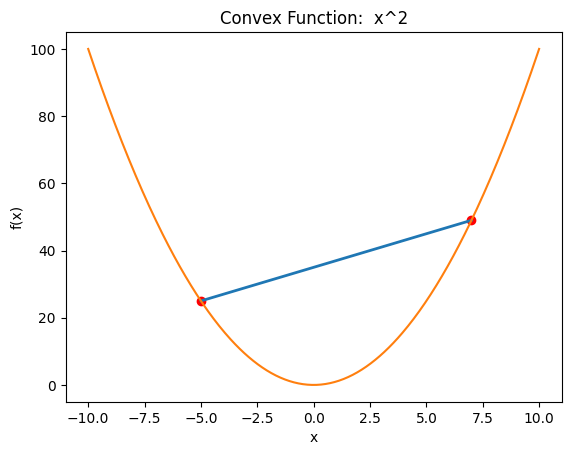

In [51]:
# Define the parabola
def f(x):
    return x**2

# Generate data for the parabola y = x^2
xs = np.linspace(-10, 10, 400)
ys = xs**2

# Choose two points on the parabola
x1, x2 = -5.0, 7.0
p1 = (x1, f(x1))
p2 = (x2, f(x2))

plt.figure()
# Plot the two points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Draw the line segment connecting them
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2)

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Convex Function:  x^2")
plt.show()

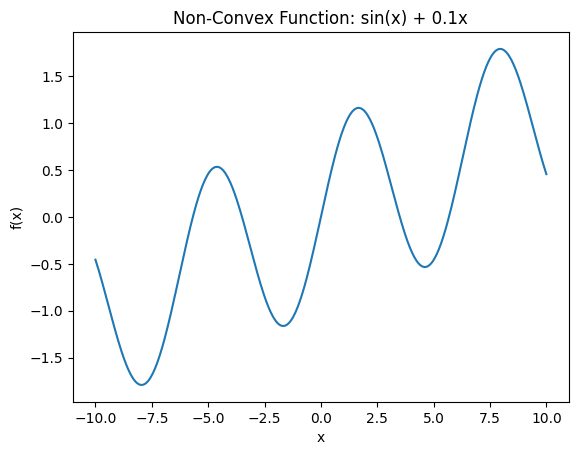

In [52]:
# Non-convex function: f(x) = sin(x) + 0.1x
x = np.linspace(-10, 10, 400)
y = np.sin(x) + 0.1 * x

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: sin(x) + 0.1x")
plt.show()

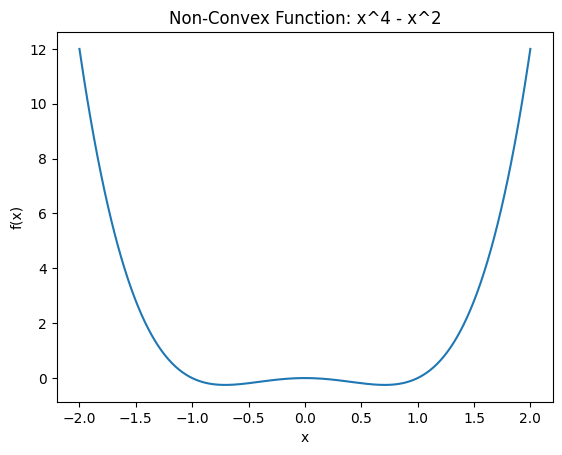

In [53]:
# Non-convex function: f(x) = x^4 - x^2
x = np.linspace(-2, 2, 400)
y = x**4 - x**2

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: x^4 - x^2")
plt.show()


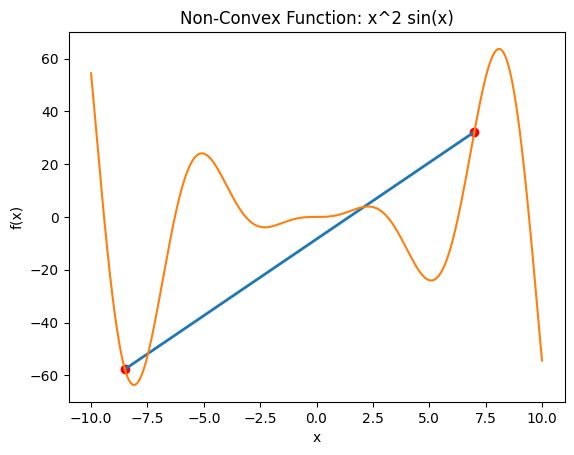

In [54]:
# Define the fn
def f(x):
    return x**2 * np.sin(x)

# Non-convex function: f(x) = x^2 * sin(x)
xs = np.linspace(-10, 10, 600)
ys = xs**2 * np.sin(xs)

# Choose two points on the fn
x1, x2 = -8.5, 7.0
p1 = (x1, f(x1))
p2 = (x2, f(x2))

plt.figure()
# Plot the two points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Draw the line segment connecting them
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2)

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: x^2 sin(x)")
plt.show()

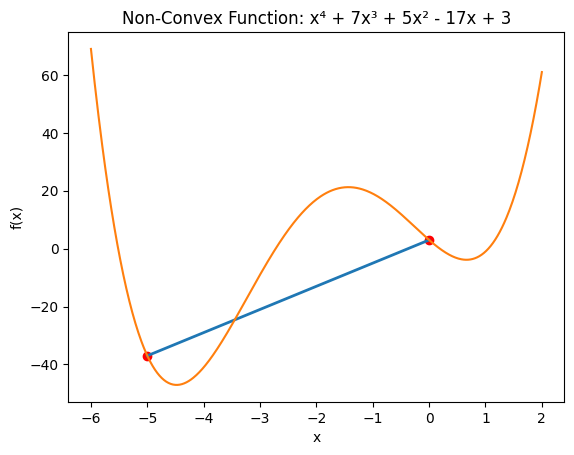

In [55]:
# Define the fn
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3


xs = np.linspace(-6, 2, 600)
ys = xs**4 + 7*xs**3 + 5*xs**2 - 17*xs + 3

# Choose two points on the fn
x1, x2 = -5, 0
p1 = (x1, f(x1))
p2 = (x2, f(x2))

plt.figure()
# Plot the two points
plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red')

# Draw the line segment connecting them
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=2)

plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function: x⁴ + 7x³ + 5x² - 17x + 3")
plt.show()

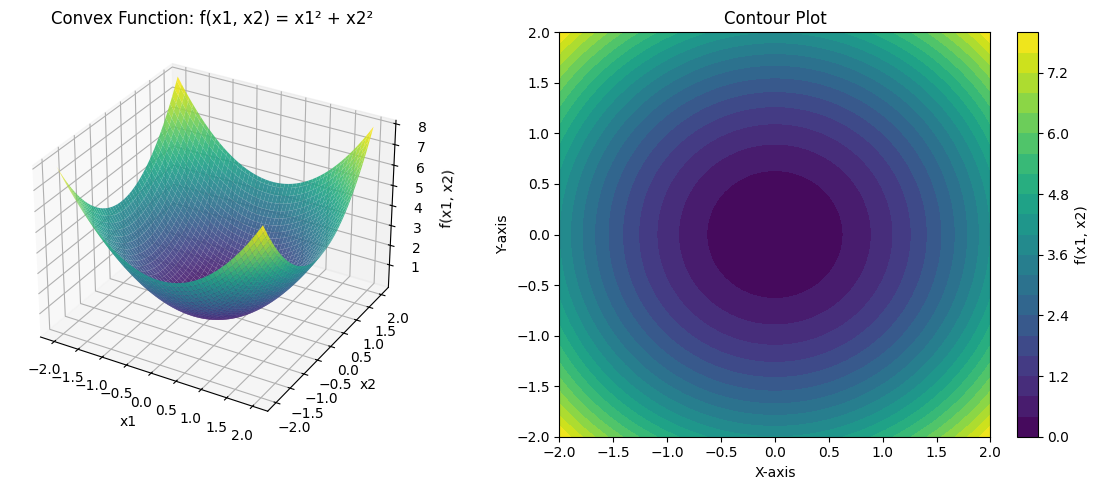

In [56]:
from mpl_toolkits.mplot3d import Axes3D
# Create a grid of (x1, x2) values
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Define the convex function
Z = X1**2 + X2**2

# Set up the figure
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface
surf = ax1.plot_surface(X1, X2, Z, alpha=0.9, cmap='viridis')

# Labels
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('Convex Function: f(x1, x2) = x1² + x2²')

# Plot on the second subplot (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=20, cmap='viridis')
fig.colorbar(contour, ax=ax2, label='f(x1, x2)')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')


# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plots
plt.show()

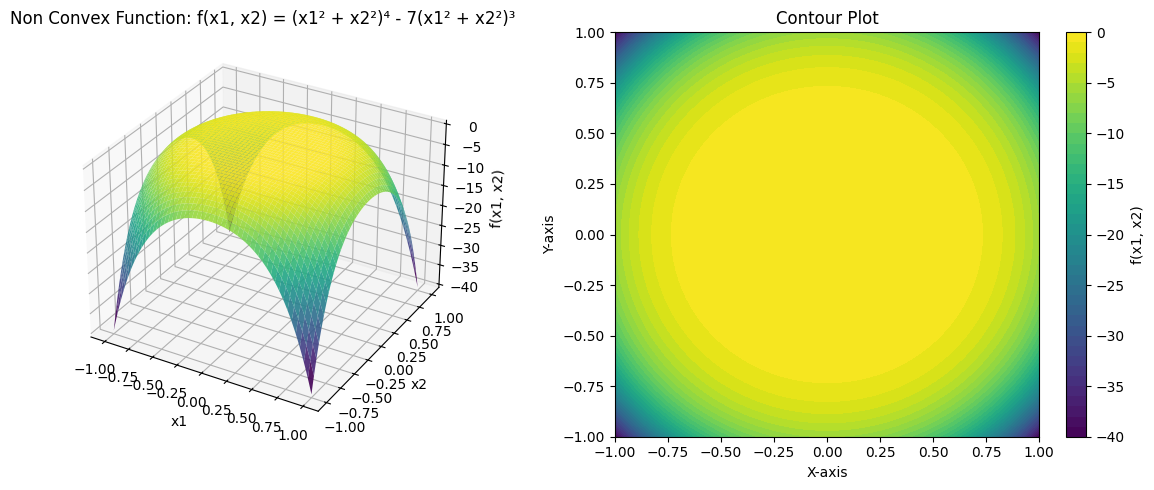

In [81]:
# Create a grid of (x1, x2) values
x1 = np.linspace(-1, 1, 500)
x2 = np.linspace(-1, 1, 500)
X1, X2 = np.meshgrid(x1, x2)

# Define the non-convex function
Z = (X1**2 + X2**2)**4 - 7*(X1**2 + X2**2)**3 #+ 13*(X1**2 + X2**2)**2
# Z = np.sin(X1**2 + X2**2)  # Non-convex

# Set up the figure
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface
surf = ax1.plot_surface(X1, X2, Z, alpha=0.9, cmap='viridis')


# Labels
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('Non Convex Function: f(x1, x2) = (x1² + x2²)⁴ - 7(x1² + x2²)³')# + 13(x1² + x2²)²')

# Define contour levels spanning the full range
levels = np.linspace(Z.min(), Z.max(), 100)

# Plot on the second subplot (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=40, cmap='viridis')
fig.colorbar(contour, ax=ax2, label='f(x1, x2)')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')


# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plots
plt.show()

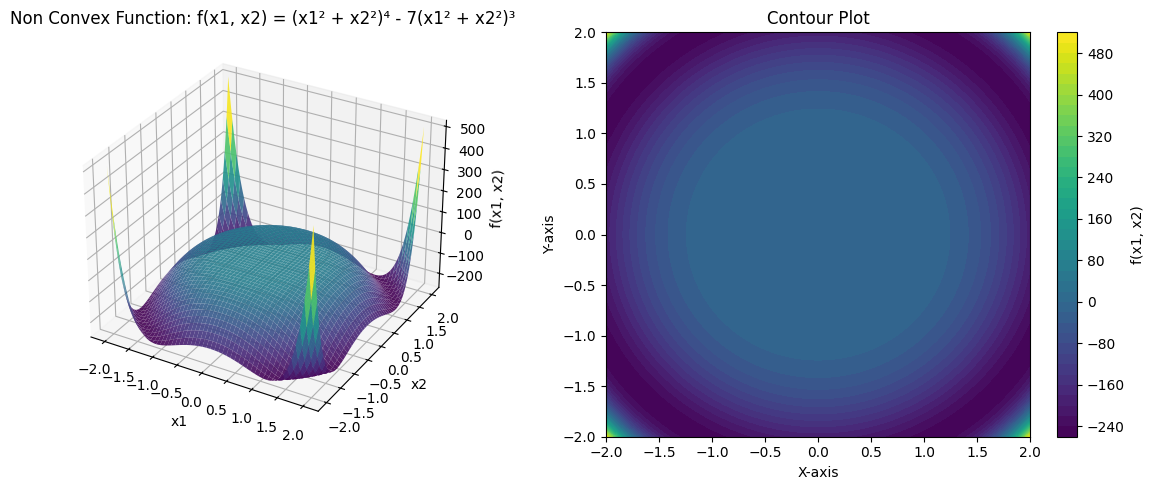

In [82]:
# Create a grid of (x1, x2) values
x1 = np.linspace(-2, 2, 500)
x2 = np.linspace(-2, 2, 500)
X1, X2 = np.meshgrid(x1, x2)

# Define the non-convex function
Z = (X1**2 + X2**2)**4 - 7*(X1**2 + X2**2)**3 #+ 13*(X1**2 + X2**2)**2
# Z = np.sin(X1**2 + X2**2)  # Non-convex

# Set up the figure
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface
surf = ax1.plot_surface(X1, X2, Z, alpha=0.9, cmap='viridis')


# Labels
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
# fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)
ax1.set_title('Non Convex Function: f(x1, x2) = (x1² + x2²)⁴ - 7(x1² + x2²)³')# + 13(x1² + x2²)²')

# Define contour levels spanning the full range
levels = np.linspace(Z.min(), Z.max(), 100)

# Plot on the second subplot (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X1, X2, Z, levels=40, cmap='viridis')
fig.colorbar(contour, ax=ax2, label='f(x1, x2)')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')


# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Display the plots
plt.show()

#### Demos

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# -------------------------------------
# Define the function and derivatives
# -------------------------------------
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

def f_prime(x):
    return 4*x**3 + 21*x**2 + 10*x - 17

def f_double_prime(x):
    return 12*x**2 + 42*x + 10

# -------------------------------------
# Compute local minima & maxima from f'(x)=0
# -------------------------------------
coeffs = [4, 21, 10, -17]  # 4x^3 + 21x^2 + 10x -17
roots = np.roots(coeffs)
critical_pts = np.real(roots[np.isreal(roots)])
critical_pts.sort()

# Label minima/maxima correctly
labels = []
for x0 in critical_pts:
    if f_double_prime(x0) > 0:
        labels.append("local minimum")
    else:
        labels.append("local maximum")

# Dropdown menu options for selecting the extremum
extrema_options = {
    f"{label} at x={x0:.4f}": x0
    for label, x0 in zip(labels, critical_pts)
}

# Color options for highlighting the curve
color_options = {
    "red": "red",
    "blue": "blue",
    "green": "green",
    "orange": "orange",
    "purple": "purple"
}

# -------------------------------------
# Plotting function
# -------------------------------------
def plot_extremum(x0, highlight_color):
    X = np.linspace(-6, 3, 600)
    Y = f(X)

    y0 = f(x0)
    slope = f_prime(x0)

    # Tangent line exactly at x0
    x_tan = np.linspace(x0 - 1, x0 + 1, 300)
    y_tan = y0 + slope * (x_tan - x0)

    # Shaded curve region around extremum
    x_local = np.linspace(x0 - 0.8, x0 + 0.8, 400)
    y_local = f(x_local)

    plt.figure(figsize=(9,6))

    # Plot the whole function in base color
    plt.plot(X, Y, color="black", alpha=0.6, label="f(x)")

    # Highlight the curve near the extremum (colored line)
    plt.plot(x_local, y_local, linewidth=3, color=highlight_color,
             label=f"curvature")

    # Tangent line (dashed)
    plt.plot(x_tan, y_tan, linestyle="--", linewidth=2, label="tangent line")

    # Mark the extremum
    plt.scatter([x0], [y0], s=90, color="red", zorder=5)

    plt.title(f"Local Optimum at x = {x0:.4f}   (f(x0) = {y0:.4f})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()


# -------------------------------------
# Interactive widget
# -------------------------------------
interact(
    plot_extremum,
    x0=extrema_options,
    highlight_color=color_options
)


interactive(children=(Dropdown(description='x0', options={'local minimum at x=-4.4803': -4.480268480373647, 'l…

<function __main__.plot_extremum(x0, highlight_color)>

Critical points: [-4.48026848 -1.4321124   0.66238088]
GIF saved: local_optima_animation.gif


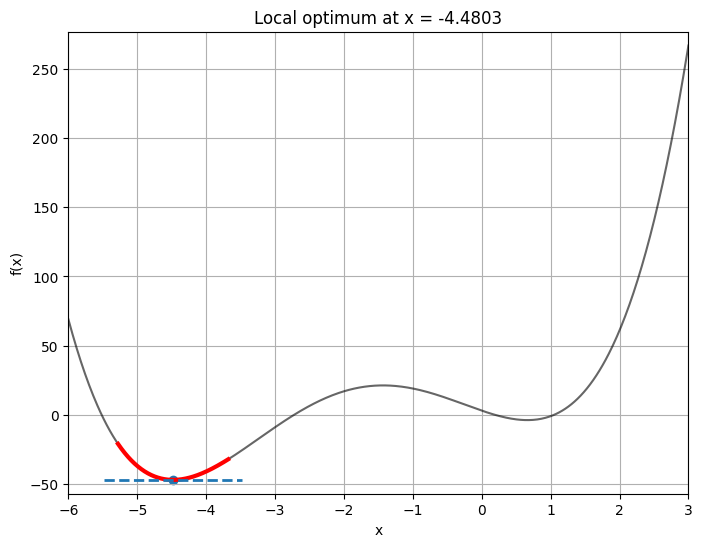

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ---------------------------------------
# Define function and derivative
# ---------------------------------------
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

def f_prime(x):
    return 4*x**3 + 21*x**2 + 10*x - 17


# ---------------------------------------
# Compute the correct local minima/maxima
# ---------------------------------------
# Solve f'(x) = 0 for real roots
coeffs = [4, 21, 10, -17]
roots = np.roots(coeffs)
critical_points = np.real(roots[np.isreal(roots)])
critical_points.sort()

print("Critical points:", critical_points)

# ---------------------------------------
# Set up plotting grid
# ---------------------------------------
X = np.linspace(-6, 3, 600)
Y = f(X)

# ---------------------------------------
# Set up figure
# ---------------------------------------
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, color="black", alpha=0.6, label="f(x)")
ax.set_xlim(-6, 3)
ax.set_ylim(min(Y)-10, max(Y)+10)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)

# Lines that will update
highlight_line, = ax.plot([], [], linewidth=3, color="red")
tangent_line, = ax.plot([], [], linestyle="--", linewidth=2)
point_scatter = ax.scatter([], [])


# ---------------------------------------
# Animation update function
# ---------------------------------------
def update(frame):
    x0 = critical_points[frame]
    y0 = f(x0)
    slope = f_prime(x0)

    # Highlight region around optimum
    x_local = np.linspace(x0 - 0.8, x0 + 0.8, 200)
    y_local = f(x_local)
    highlight_line.set_data(x_local, y_local)

    # Tangent line
    x_tan = np.linspace(x0 - 1, x0 + 1, 200)
    y_tan = y0 + slope * (x_tan - x0)
    tangent_line.set_data(x_tan, y_tan)

    # Point marker
    point_scatter.set_offsets([[x0, y0]])

    # Title
    ax.set_title(f"Local optimum at x = {x0:.4f}")

    return highlight_line, tangent_line, point_scatter


# ---------------------------------------
# Create animation
# ---------------------------------------
anim = FuncAnimation(
    fig,
    update,
    frames=len(critical_points),
    interval=1500,
    blit=False
)

# ---------------------------------------
# Save GIF
# ---------------------------------------
gif_path = "local_optima_animation.gif"
anim.save(gif_path, writer=PillowWriter(fps=1))

print("GIF saved:", gif_path)


![My demo](media/gif/local_optima_animation.gif)

### Gradient Descent Demo

In [ ]:
# --- make sure widgets and plotting work in THIS notebook ---
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection
import ipywidgets as widgets
from ipywidgets import interact

# ----- cost + gradient -----
def cost_function(x):
    return x[0]**2 + x[1]**2

def gradient_cost_function(x):
    return np.array([2*x[0], 2*x[1]])

# ----- precompute surface -----
x1 = np.linspace(-1.0, 1.0, 100)
x2 = np.linspace(-1.0, 1.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = cost_function((X1, X2))

def compute_trajectory(x0, y0, eta, nb_steps):
    """Return array of shape (nb_steps+1, 3): [x, y, f(x,y)]."""
    x = np.array([x0, y0], dtype=float)
    traj = np.empty((nb_steps + 1, 3))
    traj[0] = [x[0], x[1], cost_function(x)]
    for t in range(1, nb_steps + 1):
        grad = gradient_cost_function(x)
        x = x - eta * grad
        traj[t] = [x[0], x[1], cost_function(x)]
    return traj

def plot_gradient_descent(x0=0.8, y0=0.8, eta=0.1, steps=10):
    steps = int(steps)
    if steps < 1:
        steps = 1

    traj = compute_trajectory(x0, y0, eta, steps)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # surface: brighter colormap
    surf = ax.plot_surface(
        X1, X2, Z,
        cmap=cm.plasma,
        linewidth=0,
        antialiased=True,
        alpha=0.85
    )

    # gradient descent path
    ax.plot(
        traj[:, 0], traj[:, 1], traj[:, 2],
        color='black',
        marker='o',
        markersize=6,
        linewidth=2,
        label='GD path'
    )

    # start / end markers
    ax.scatter(traj[0, 0], traj[0, 1], traj[0, 2],
               color='lime', s=80, marker='o', label='start')
    ax.scatter(traj[-1, 0], traj[-1, 1], traj[-1, 2],
               color='red', s=80, marker='*', label='end')

    ax.set_xlabel('$x_1$', labelpad=8)
    ax.set_ylabel('$x_2$', labelpad=8)
    ax.set_zlabel('$f(x_1, x_2)$', labelpad=8)
    ax.set_title('Gradient Descent on $f(x_1, x_2) = x_1^2 + x_2^2$', pad=14)

    ax.view_init(elev=30, azim=-135)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 2)

    ax.legend(loc='upper left')
    fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, pad=0.1, label='$f(x_1,x_2)$')

    plt.show()

# ----- interactive widgets -----
interact(
    plot_gradient_descent,
    x0=widgets.FloatSlider(value=0.8, min=-1.0, max=1.0, step=0.05, description='x₁ start'),
    y0=widgets.FloatSlider(value=0.8, min=-1.0, max=1.0, step=0.05, description='x₂ start'),
    eta=widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='η (step size)'),
    steps=widgets.IntSlider(value=10, min=1, max=30, step=1, description='steps')
);


'media/gif/gd_fixed_0.10.gif'

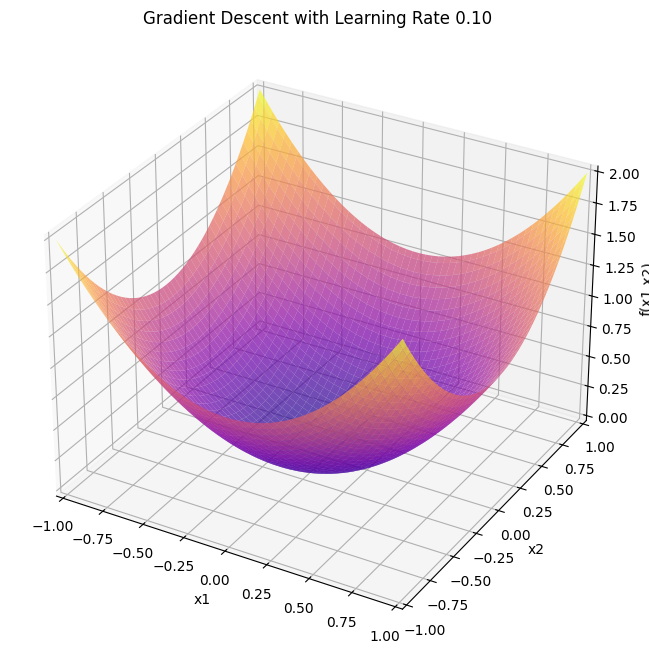

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# ---- Cost function and gradient ----
def cost_function(x1, x2):
    return x1**2 + x2**2

def gradient(x):
    return np.array([2*x[0], 2*x[1]])

# ---- Parameters ----
nb_steps = 20
x0 = np.array([0.8, 0.8])
learning_rate = 0.1

# ---- Generate GD trajectory ----
def gen_trajectory():
    x = x0.copy()
    data = np.zeros((3, nb_steps+1))
    data[:, 0] = [x[0], x[1], cost_function(x[0], x[1])]

    for t in range(1, nb_steps+1):
        grad = gradient(x)
        x = x - learning_rate * grad
        data[:, t] = [x[0], x[1], cost_function(x[0], x[1])]

    return data

trajectory = gen_trajectory()

# ---- Plot setup ----
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface grid
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = cost_function(X, Y)

# Draw surface
ax.plot_surface(X, Y, Z, cmap=cm.plasma, rstride=2, cstride=2, alpha=0.7, linewidth=0)

# Starting point line object
line = ax.plot([trajectory[0,0]], [trajectory[1,0]], [trajectory[2,0]],color='black',
               marker='o', markersize=6, linewidth=2)[0]

# Axes
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 2])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')
ax.set_title(f"Gradient Descent with Learning Rate {learning_rate:.2f}")
ax.view_init(30, -60)

# ---- Frame update ----
def update_frame(i):
    line.set_data(trajectory[0, :i], trajectory[1, :i])
    line.set_3d_properties(trajectory[2, :i])
    return line

# ---- Build Animation ----
anim = animation.FuncAnimation(fig, update_frame, nb_steps+1, interval=200)
filename = f"gd_fixed_{learning_rate:.2f}.gif"
# Save GIF
gif_path = "media/gif/"+filename
anim.save(gif_path, writer='pillow', dpi=80)

gif_path


In [62]:
trajectory

array([[8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [1.28000000e+00, 8.19200000e-01, 5.24288000e-01, 3.35544320e-01,
        2.14748365e-01, 1.37438953e-01, 8.79609302e-02, 5.62949953e-02,
        3.60287970e-02, 2.30584301e-02, 1.47573953e-02, 9.44473297e-03,
        6.0446

![My demo](media/gif/gd_fixed_0.10.gif)

/var/folders/hp/tk82gyb554bbrfrngwy7c6rw0000gn/T/ipykernel_89888/2695455013.py:45: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(xs[frame], ys[frame])
/var/folders/hp/tk82gyb554bbrfrngwy7c6rw0000gn/T/ipykernel_89888/2695455013.py:45: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(xs[frame], ys[frame])


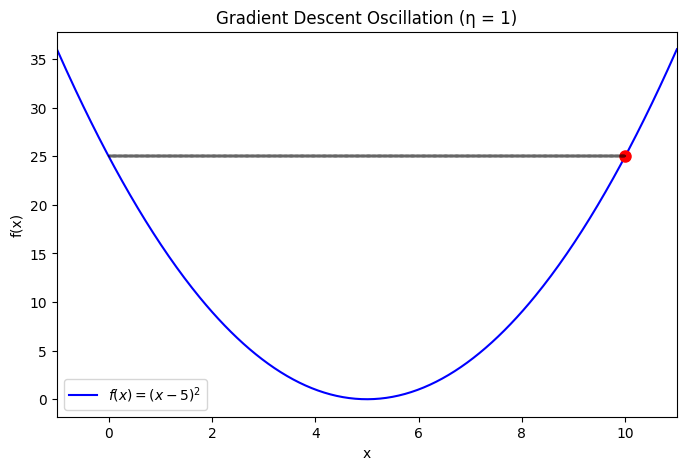

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---- function + gradient ----
def f(x):
    return (x - 5)**2

def grad_f(x):
    return 2*(x - 5)

# ---- parameters ----
x0 = 10
eta = 1.0                # step size (too large → oscillation)
num_steps = 20

# ---- compute trajectory ----
xs = [x0]
for _ in range(num_steps):
    x_new = xs[-1] - eta * grad_f(xs[-1])
    xs.append(x_new)

xs = np.array(xs)
ys = f(xs)

# ---- set up plot ----
xline = np.linspace(-1, 11, 400)
yline = f(xline)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xline, yline, 'b-', label='$f(x) = (x-5)^2$')
point, = ax.plot([], [], 'ro', markersize=8)
trace, = ax.plot([], [], 'k--', alpha=0.6)

ax.set_title("Gradient Descent Oscillation (η = 1)")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xlim(-1, 11)
# ax.set_ylim(0, 30)
ax.legend()

# ---- animation update ----
def update(frame):
    # current point
    point.set_data(xs[frame], ys[frame])
    # trace
    trace.set_data(xs[:frame+1], ys[:frame+1])
    return point, trace

ani = animation.FuncAnimation(
    fig, update, frames=len(xs), interval=500, blit=True
)

# Save a GIF
ani.save('media/gif/gd_oscillation.gif', writer='pillow', dpi=80)

plt.show()


![Test demo](media/gif/gd_oscillation.gif)

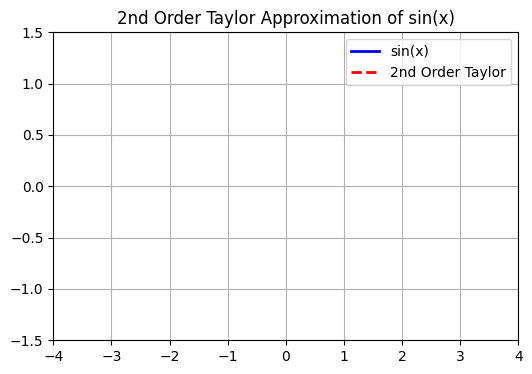

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- Function and Taylor approximation ---
def f(x):
    return np.sin(x)

def taylor2(x):
    return x - x**3 / 6   # 2nd order around 0

# --- Data ---
x = np.linspace(-4, 4, 300)
y_true = f(x)
y_t2 = taylor2(x)

# Reduce frame count for faster GIF generation
frames = 120

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-4, 4)
ax.set_ylim(-1.5, 1.5)
ax.set_title("2nd Order Taylor Approximation of sin(x)")
ax.grid(True)

line_true, = ax.plot([], [], 'b', linewidth=2, label="sin(x)")
line_t2,   = ax.plot([], [], 'r--', linewidth=2, label="2nd Order Taylor")
ax.legend()

# --- Animation ---
def init():
    line_true.set_data([], [])
    line_t2.set_data([], [])
    return line_true, line_t2

def update(frame):
    n = int((frame / frames) * len(x))
    line_true.set_data(x[:n], y_true[:n])
    line_t2.set_data(x[:n], y_t2[:n])
    return line_true, line_t2

ani = FuncAnimation(fig, update, frames=frames, init_func=init, interval=40)

gif_path = "media/gif/taylor_sin_N2.gif"
ani.save(gif_path, dpi=90, writer=PillowWriter())

![My demo](media/gif/taylor_sin_N2.gif)

#### Newton's Method

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
from matplotlib import cm

# Function, gradient, Hessian
def f(x):
    return x[0]**2 + x[1]**2

def grad(x):
    return np.array([2*x[0], 2*x[1]])

def hessian(x):
    return np.array([[2, 0],
                     [0, 2]])

def newton_step(x):
    H = hessian(x)
    g = grad(x)
    return x - np.linalg.inv(H) @ g # np.linalg.solve(H, g)  # Newton update: x_{k+1} = x - H^{-1} g

# Create surface mesh
X = np.linspace(-1, 1, 200)
Y = np.linspace(-1, 1, 200)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

# Visualization function
def plot_newton(x0_1, x0_2):
    x = np.array([x0_1, x0_2])
    trajectory = [x]

    # Newton iteration (only 1 step needed here, but let's do several)
    for _ in range(5):
        x = newton_step(x)
        trajectory.append(x)

    trajectory = np.array(trajectory)

    # Plot the 3D surface and trajectory
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(XX, YY, ZZ, cmap=cm.plasma, alpha=0.7, edgecolor='none')
    
    # Trajectory line
    ax.plot(trajectory[:,0], trajectory[:,1], [f(p) for p in trajectory], 
            '-o', color='red', markersize=5, label="Newton Path")

    # Labeling
    ax.set_title("Newton's Method on f(x1,x2)=x1²+x2²", fontsize=14)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x)")

    ax.legend()
    plt.show()

# Widget
interact(
    plot_newton,
    x0_1=FloatSlider(value=2.0, min=-4, max=4, step=0.1, description="x1 start"),
    x0_2=FloatSlider(value=2.0, min=-4, max=4, step=0.1, description="x2 start"),
);


interactive(children=(FloatSlider(value=2.0, description='x1 start', max=4.0, min=-4.0), FloatSlider(value=2.0…

Saved GIF: media/gif/newton.gif


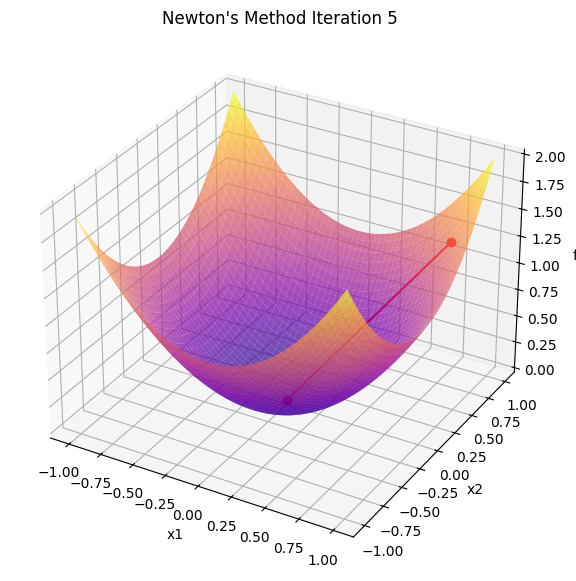

In [87]:
import matplotlib.animation as animation

def animate_newton(x0_1, x0_2, filename):
    x = np.array([x0_1, x0_2])
    trajectory = [x]

    for _ in range(5):
        x = newton_step(x)
        trajectory.append(x)
    trajectory = np.array(trajectory)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    def update(i):
        ax.clear()
        ax.plot_surface(XX, YY, ZZ, cmap=cm.plasma, alpha=0.7, edgecolor='none')
        ax.plot(trajectory[:i,0], trajectory[:i,1], [f(p) for p in trajectory[:i]], 
                '-o', color='red', markersize=6)
        ax.set_title("Newton's Method Iteration {}".format(i))
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("f")
        return ax

    anim = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=800)
    anim.save(filename, writer='pillow')

    print(f"Saved GIF: {filename}")

# Example usage:
animate_newton(0.8, 0.8, "media/gif/newton.gif")


In [88]:
trajectory

array([[8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [8.00000000e-01, 6.40000000e-01, 5.12000000e-01, 4.09600000e-01,
        3.27680000e-01, 2.62144000e-01, 2.09715200e-01, 1.67772160e-01,
        1.34217728e-01, 1.07374182e-01, 8.58993459e-02, 6.87194767e-02,
        5.49755814e-02, 4.39804651e-02, 3.51843721e-02, 2.81474977e-02,
        2.25179981e-02, 1.80143985e-02, 1.44115188e-02, 1.15292150e-02,
        9.22337204e-03],
       [1.28000000e+00, 8.19200000e-01, 5.24288000e-01, 3.35544320e-01,
        2.14748365e-01, 1.37438953e-01, 8.79609302e-02, 5.62949953e-02,
        3.60287970e-02, 2.30584301e-02, 1.47573953e-02, 9.44473297e-03,
        6.0446

![My demo](media/gif/newton.gif)

In [98]:
# ============================================================
#  Logistic Regression Optimization Case Study
#  Dataset: UCI Breast Cancer Diagnostic
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------
# Load and preprocess data
# -----------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1,1)
print(X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Add bias term
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test  = np.hstack([np.ones((X_test.shape[0],1)), X_test])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

(569, 30)
Train shape: (455, 31)
Test shape: (114, 31)


In [102]:
# -----------------------
# Logistic Regression Ops
# -----------------------
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_loss(w, X, y):
    z = np.dot(X, w)
    p = sigmoid(z)
    eps = 1e-10
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

def grad_logistic(w, X, y):
    z = np.dot(X, w)
    p = sigmoid(z)
    return X.T @ (p - y) / len(y)

def hessian_logistic(w, X, y):
    z = np.dot(X, w)
    p = sigmoid(z)
    D = np.diag((p*(1-p)).flatten())
    return X.T @ D @ X / len(y)

# -----------------------
# Optimization Algorithms
# -----------------------

# Batch Gradient Descent
def gradient_descent(w0, X, y, lr=0.1, iters=200):
    w = w0.copy()
    losses = []
    for _ in range(iters):
        g = grad_logistic(w, X, y)
        w -= lr*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# SGD
def sgd(w0, X, y, lr=0.1, iters=200):
    w = w0.copy()
    losses = []
    n = len(y)
    for _ in range(iters):
        i = np.random.randint(n)
        g = grad_logistic(w, X[i:i+1], y[i:i+1])
        w -= lr*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# Mini-batch GD
def mbgd(w0, X, y, lr=0.1, iters=200, batch_size=32):
    w = w0.copy()
    losses = []
    n = len(y)
    for _ in range(iters):
        idx = np.random.choice(n, batch_size, replace=False)
        for i in range(0, n, batch_size):
            Xb, yb = X[i:i+batch_size], y[i:i+batch_size]
            g = grad_logistic(w, Xb, yb)
            w -= lr*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# AdaGrad
def adagrad(w0, X, y, lr=0.5, iters=200, eps=1e-8):
    w = w0.copy()
    G = np.zeros_like(w)
    losses = []
    for _ in range(iters):
        g = grad_logistic(w, X, y)
        G += g*g
        w -= (lr/(np.sqrt(G) + eps))*g
        losses.append(logistic_loss(w, X, y))
    return w, losses

# Newton’s Method
def newton_method(w0, X, y, iters=10, damping=1e-3):
    w = w0.copy()
    losses = []
    for _ in range(iters):
        g = grad_logistic(w, X, y)
        H = hessian_logistic(w, X, y)
        H_reg = H + damping*np.eye(len(w))
        step = np.linalg.inv(H_reg) @ g
        w -= step
        losses.append(logistic_loss(w, X, y))
    return w, losses

# -----------------------
# Run Experiments
# -----------------------
d = X_train.shape[1]
w0 = np.zeros((d,1))

w_gd, L_gd = gradient_descent(w0, X_train, y_train)
w_sgd, L_sgd = sgd(w0, X_train, y_train)
w_mb, L_mb = mbgd(w0, X_train, y_train)
w_ag, L_ag = adagrad(w0, X_train, y_train)
w_nt, L_nt = newton_method(w0, X_train, y_train)

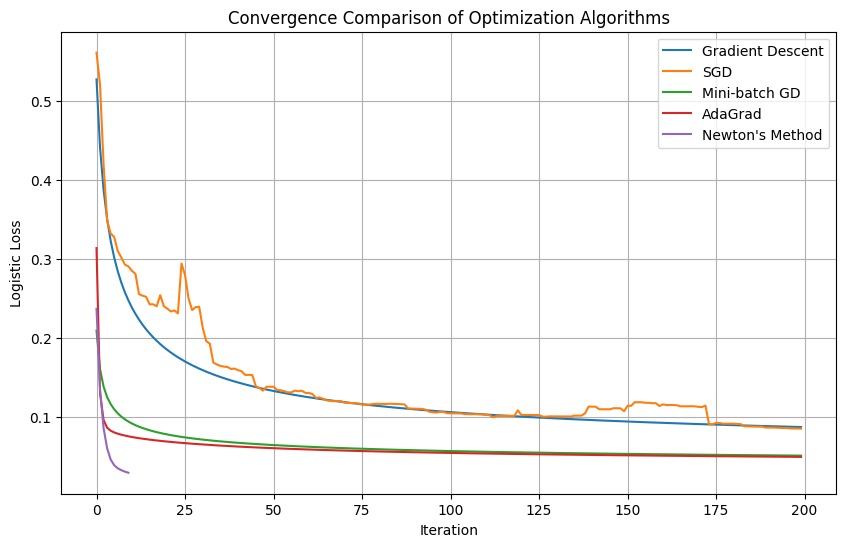

In [103]:
# -----------------------
# Plot Loss Curves
# -----------------------
plt.figure(figsize=(10,6))
plt.plot(L_gd, label="Gradient Descent")
plt.plot(L_sgd, label="SGD")
plt.plot(L_mb, label="Mini-batch GD")
plt.plot(L_ag, label="AdaGrad")
plt.plot(L_nt, label="Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.title("Convergence Comparison of Optimization Algorithms")
plt.legend()
plt.grid(True)
plt.show()

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score
# -----------------------
# Accuracy Evaluation
# -----------------------
def performance(w, X, y):
    preds = (sigmoid(np.dot(X, w)) >= 0.5).astype(int)
    return np.mean(preds == y), f1_score(y, preds)

print("Train Accuracy & F1 Score:")
print("- GD:", performance(w_gd, X_train, y_train))
print("- SGD:", performance(w_sgd, X_train, y_train))
print("- MBGD:", performance(w_mb, X_train, y_train))
print("- AdaGrad:", performance(w_ag, X_train, y_train))
print("- Newton:", performance(w_nt, X_train, y_train))

print("\nTest Accuracy & F1 Score:")
print("- GD:", performance(w_gd, X_test, y_test))
print("- SGD:", performance(w_sgd, X_test, y_test))
print("- MBGD:", performance(w_mb, X_test, y_test))
print("- AdaGrad:", performance(w_ag, X_test, y_test))
print("- Newton:", performance(w_nt, X_test, y_test))

Train Accuracy & F1 Score:
- GD: (0.9824175824175824, 0.9861111111111112)
- SGD: (0.9758241758241758, 0.9809358752166378)
- MBGD: (0.9868131868131869, 0.9895470383275261)
- AdaGrad: (0.9868131868131869, 0.9895470383275261)
- Newton: (0.989010989010989, 0.9912739965095986)

Test Accuracy & F1 Score:
- GD: (0.9912280701754386, 0.993006993006993)
- SGD: (0.9736842105263158, 0.9790209790209791)
- MBGD: (0.9824561403508771, 0.9859154929577465)
- AdaGrad: (0.9824561403508771, 0.9859154929577465)
- Newton: (0.9649122807017544, 0.9714285714285714)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyBboxPatch
from matplotlib.lines import Line2D
from IPython.display import HTML

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1) Load your CSV
# ----------------------------
df = pd.read_csv("data/data_for_tree_Oct22.csv")
df.head()

,Height,Diameter,Age Class,Ward,Species,Family,num_examples_species,num_examples_family,Height_mean,Height_std,Diameter_mean,Diameter_std,num
0,5.378135,0.283705,Mature,Garden Suburb,Sorbus intermedia,apple,535,2387,7.070517,1.936967,0.354316,0.096245,329
1,7.026771,0.332076,Mature,Brunswick Park,Sorbus aucuparia,apple,641,2387,7.070517,1.936967,0.354316,0.096245,329
2,8.315905,0.433735,Mature,Brunswick Park,Sorbus aria,apple,415,2387,7.070517,1.936967,0.354316,0.096245,329
3,3.649893,0.340193,Mature,Garden Suburb,Sorbus intermedia,apple,535,2387,7.070517,1.936967,0.354316,0.096245,329
4,6.507516,0.420813,Mature,Woodhouse,Sorbus aria,apple,415,2387,7.070517,1.936967,0.354316,0.096245,329


In [7]:
len(df)

150

In [9]:
# Your file uses these column names:
X = df[["Diameter", "Height"]].values
y_raw = df["Family"].astype(str).values  # apple / cherry / oak

# Encode labels for the classifier
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = le.classes_
feature_names = ["Diameter", "Height"]

# ----------------------------
# 2) Colors + legend mapping
# ----------------------------
def norm_label(s: str) -> str:
    return s.strip().lower()

color_map = {"apple": "red", "cherry": "purple", "oak": "green"}
point_colors = [color_map.get(norm_label(lbl), "gray") for lbl in y_raw]

handles = []
for name in ["apple", "cherry", "oak"]:
    if any(norm_label(lbl) == name for lbl in y_raw):
        handles.append(
            Line2D([0], [0], marker="o", color="w",
                   markerfacecolor=color_map[name], markeredgecolor="k",
                   markersize=8, label=name.title())
        )

# ----------------------------
# 3) Mesh for decision regions
# ----------------------------
pad = 0.5
x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# ----------------------------
# 4) Tree layout helpers
# ----------------------------
def compute_depth(children_left, children_right):
    n = len(children_left)
    depth = np.zeros(n, dtype=int)
    stack = [(0, 0)]
    while stack:
        node, d = stack.pop()
        depth[node] = d
        l, r = children_left[node], children_right[node]
        if l != -1: stack.append((l, d + 1))
        if r != -1: stack.append((r, d + 1))
    return depth

def assign_leaf_x(children_left, children_right):
    """x positions in leaf-index coordinates; leaves are 0..L-1"""
    n = len(children_left)
    x = np.zeros(n, dtype=float)
    leaf_counter = 0

    def inorder(node):
        nonlocal leaf_counter
        l, r = children_left[node], children_right[node]
        is_leaf = (l == -1 and r == -1)
        if is_leaf:
            x[node] = leaf_counter
            leaf_counter += 1
            return
        if l != -1: inorder(l)
        if r != -1: inorder(r)
        child_xs = []
        if l != -1: child_xs.append(x[l])
        if r != -1: child_xs.append(x[r])
        x[node] = float(np.mean(child_xs))

    inorder(0)
    return x, max(leaf_counter, 1)

def draw_tree(ax, clf, feature_names, class_names, show_depth=None):
    """
    Draw a clean top-down tree. show_depth: show nodes/edges with depth <= show_depth.
    """
    t = clf.tree_
    L = t.children_left
    R = t.children_right
    feat = t.feature
    thr = t.threshold
    val = t.value
    n_samples = t.n_node_samples  # ✅ correct n (counts)

    depth = compute_depth(L, R)
    x, n_leaves = assign_leaf_x(L, R)
    max_d = depth.max() if len(depth) else 0

    ax.clear()
    ax.axis("off")
    ax.set_title("Classification Tree (growing)")

    def node_label(node):
        # tree_.value holds class proportions in many sklearn builds;
        # use n_node_samples for n, and proportions for class distribution.
        probs = val[node][0]
        pred = int(np.argmax(probs))
        pred_name = class_names[pred]
        n = int(n_samples[node])

        is_leaf = (L[node] == -1 and R[node] == -1)
        if is_leaf:
            return f"{pred_name}\n(n={n})"
        else:
            f = feature_names[feat[node]]
            return f"{f} ≤ {thr[node]:.3g}\n(n={n})"

    # Edges
    for node in range(t.node_count):
        if show_depth is not None and depth[node] > show_depth:
            continue
        for child, edge_tag in [(L[node], "T"), (R[node], "F")]:
            if child == -1:
                continue
            if show_depth is not None and depth[child] > show_depth:
                continue
            x0, y0 = x[node], depth[node]
            x1, y1 = x[child], depth[child]
            ax.plot([x0, x1], [y0, y1], linewidth=1.6)
            xm, ym = 0.75 * x0 + 0.25 * x1, 0.75 * y0 + 0.25 * y1
            ax.text(xm, ym, edge_tag, fontsize=9, ha="center", va="center")

    # Node box sizing: shrink automatically if the tree is wide
    # (prevents overlaps when n_leaves is large)
    base_w = min(0.96, 10.0 / max(n_leaves, 10)) * 10.0  # in leaf-units
    base_w = min(base_w, 0.96)
    base_h = 0.75

    for node in range(t.node_count):
        if show_depth is not None and depth[node] > show_depth:
            continue

        xn, yn = x[node], depth[node]
        txt = node_label(node)

        scale = max(0.55, 1.0 - 0.06 * depth[node])
        w = base_w * scale
        h = base_h * scale

        rect = FancyBboxPatch(
            (xn - w/2, yn - h/2),
            w, h,
            boxstyle="round,pad=0.02,rounding_size=0.08",
            linewidth=1.2,
            facecolor="white"
        )
        ax.add_patch(rect)
        ax.text(xn, yn, txt, fontsize=9, ha="center", va="center")

    ax.set_xlim(-0.8, (n_leaves - 1) + 0.8)
    ax.set_ylim(max_d + 0.8, -0.8)  # invert so root is on top

# ----------------------------
# 5) Fit FULL tree once to get its true depth
# ----------------------------
full_clf = DecisionTreeClassifier(max_depth=None, random_state=0)
full_clf.fit(X, y)

full_depth = compute_depth(full_clf.tree_.children_left, full_clf.tree_.children_right).max()

# ----------------------------
# 6) Animate: left regions + right full tree growing
# ----------------------------
fig, (axL, axR) = plt.subplots(
    1, 2, figsize=(16, 5),
    gridspec_kw={"width_ratios": [1.2, 2.5]},
    constrained_layout=True
)
plt.close(fig)

def draw_frame(show_d):
    # LEFT: regions from a tree pruned to show_d (so boundaries evolve with the tree)
    clf = DecisionTreeClassifier(max_depth=show_d + 1, random_state=0)
    clf.fit(X, y)
    Z = clf.predict(grid).reshape(xx.shape)

    axL.clear()
    axL.contourf(xx, yy, Z, alpha=0.22)
    axL.scatter(X[:, 0], X[:, 1], c=point_colors, edgecolor="k", s=40, linewidth=0.4)
    axL.contour(xx, yy, Z, linewidths=1.0)
    axL.set_xlim(x_min, x_max)
    axL.set_ylim(y_min, y_max)
    axL.set_xlabel("Diameter")
    axL.set_ylabel("Height")
    axL.set_title("Decision Regions (growing with tree)")
    axL.text(0.02, 0.98, f"tree depth shown = {show_d}",
             transform=axL.transAxes, ha="left", va="top",
             bbox=dict(boxstyle="round", fc="white", ec="0.7"))
    if handles:
        axL.legend(handles=handles, title="Tree type", loc="upper right", frameon=True)

    # RIGHT: draw full tree, but reveal nodes/edges only up to show_d
    draw_tree(axR, full_clf, feature_names, class_names, show_depth=show_d)

def update(i):
    draw_frame(i)
    return []

anim = FuncAnimation(fig, update, frames=full_depth + 1, interval=900, blit=False, repeat=True)
HTML(anim.to_jshtml())


In [10]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=1)  # fps ≈ 1000 / interval
anim.save("media/gif/decision_tree_growth.gif", writer=writer)

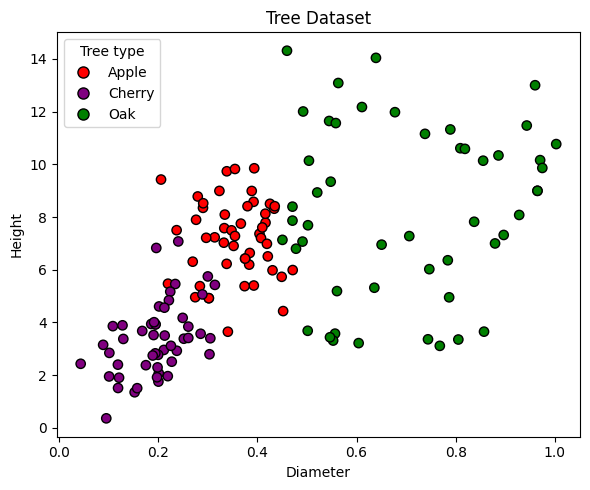

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load the data
df = pd.read_csv("data/data_for_tree_Oct22.csv")

# Extract features and labels
X = df[["Diameter", "Height"]]
y_raw = df["Family"].astype(str)

# Normalize labels
def norm_label(s):
    return s.strip().lower()

# Fixed color scheme
color_map = {
    "apple": "red",
    "cherry": "purple",
    "oak": "green",
}

point_colors = [color_map.get(norm_label(lbl), "gray") for lbl in y_raw]

# Create scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(
    X["Diameter"],
    X["Height"],
    c=point_colors,
    edgecolor="k",
    s=45
)

# Labels and title
plt.xlabel("Diameter")
plt.ylabel("Height")
plt.title("Tree Dataset")

# Legend
handles = [
    Line2D(
        [0], [0],
        marker="o",
        color="w",
        markerfacecolor=color_map[name],
        markeredgecolor="k",
        markersize=8,
        label=name.title()
    )
    for name in ["apple", "cherry", "oak"]
    if any(norm_label(lbl) == name for lbl in y_raw)
]

plt.legend(handles=handles, title="Tree type", frameon=True)

plt.tight_layout()
plt.show()


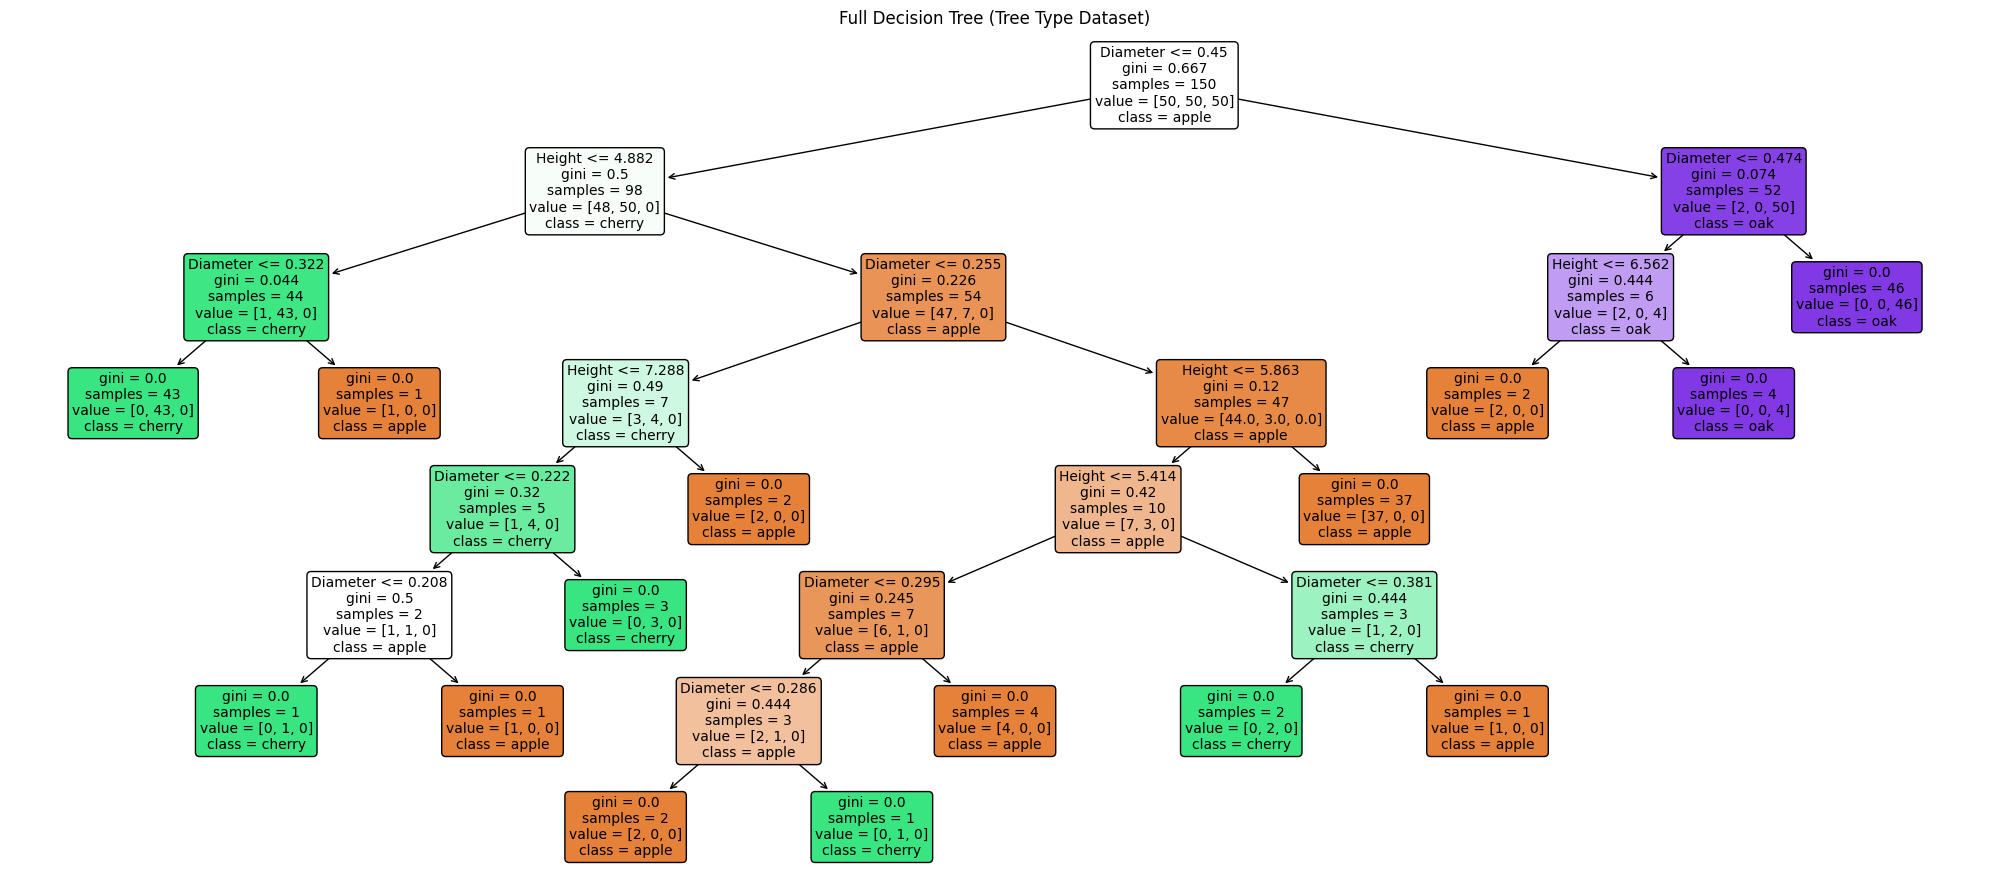

In [2]:
# Features and label
X = df[["Diameter", "Height"]].values
y_raw = df["Family"].astype(str).values

# Encode class labels
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = list(le.classes_)

# Fit a full (no max_depth cap) classification tree
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(X, y)

# Plot the full decision tree
plt.figure(figsize=(20, 9))
plot_tree(
    clf,
    feature_names=["Diameter", "Height"],
    class_names=class_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=False,
    fontsize=10
)
plt.title("Full Decision Tree (Tree Type Dataset)")
plt.tight_layout()
plt.show()


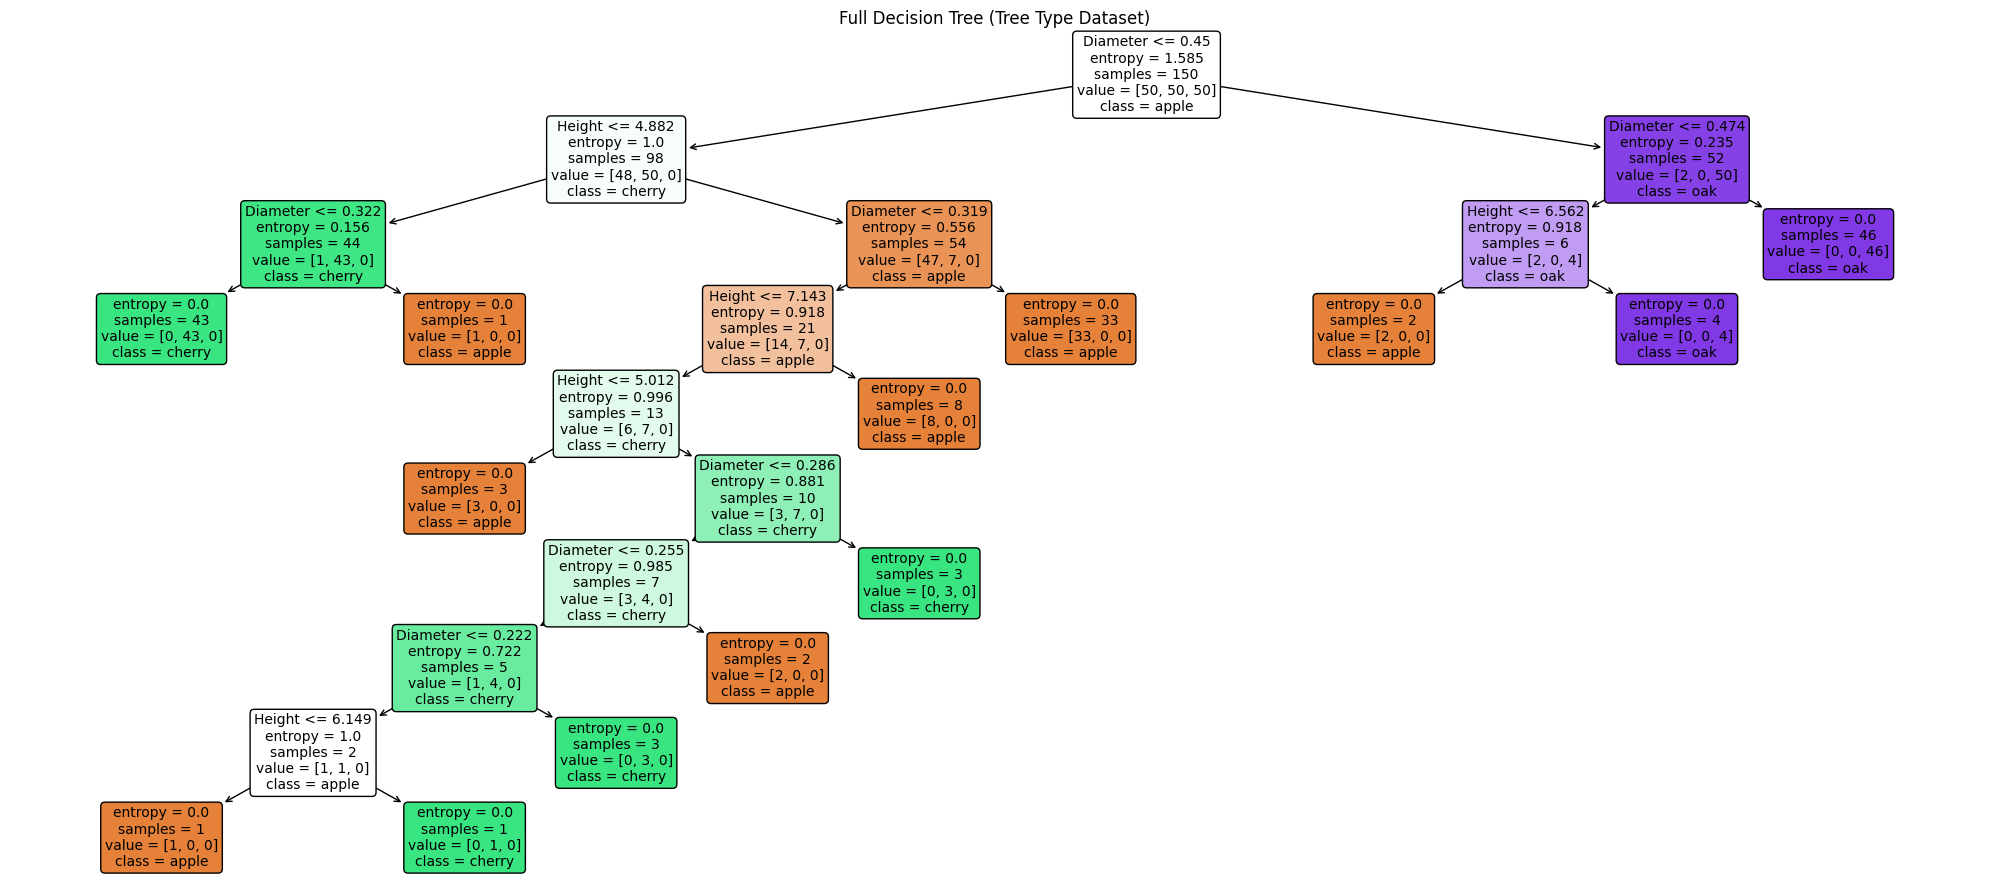

In [3]:
# Features and label
X = df[["Diameter", "Height"]].values
y_raw = df["Family"].astype(str).values

# Encode class labels
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = list(le.classes_)

# Fit a full (no max_depth cap) classification tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=0)
clf.fit(X, y)

# Plot the full decision tree
plt.figure(figsize=(20, 9))
plot_tree(
    clf,
    feature_names=["Diameter", "Height"],
    class_names=class_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=False,
    fontsize=10
)
plt.title("Full Decision Tree (Tree Type Dataset)")
plt.tight_layout()
plt.show()


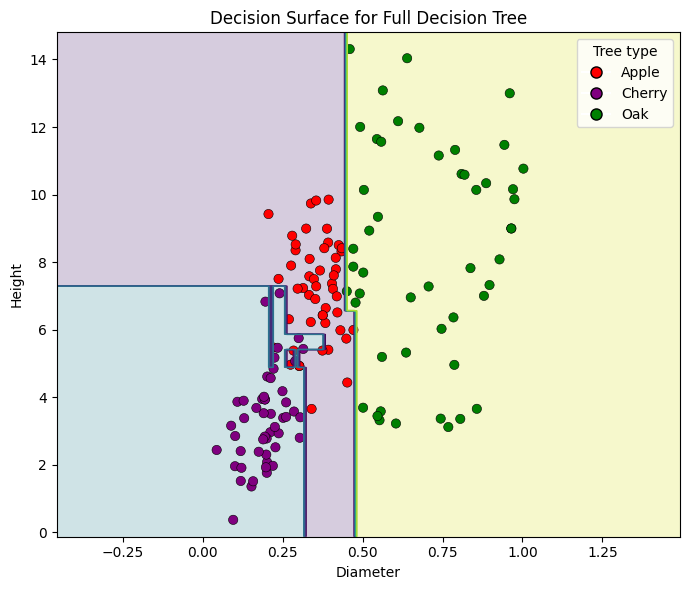

In [6]:
# Features and label
X = df[["Diameter", "Height"]].values
y_raw = df["Family"].astype(str).values

# Encode labels for the classifier
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Fit the full decision tree (no max_depth cap)
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(X, y)

# Mesh for decision surface
pad = 0.5
x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

h = 0.01
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

# Fixed color scheme for points
def norm_label(s: str) -> str:
    return s.strip().lower()

color_map = {"apple": "red", "cherry": "purple", "oak": "green"}
point_colors = [color_map.get(norm_label(lbl), "gray") for lbl in y_raw]

# Plot decision regions + points
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.22)          # regions
plt.contour(xx, yy, Z, linewidths=1.0)       # boundaries
plt.scatter(X[:, 0], X[:, 1], c=point_colors, edgecolor="k", s=45, linewidth=0.4)

plt.xlabel("Diameter")
plt.ylabel("Height")
plt.title("Decision Surface for Full Decision Tree")

# Legend matching point colors
handles = [
    Line2D([0], [0], marker="o", color="w",
           markerfacecolor=color_map[name], markeredgecolor="k",
           markersize=8, label=name.title())
    for name in ["apple", "cherry", "oak"]
    if any(norm_label(lbl) == name for lbl in y_raw)
]
plt.legend(handles=handles, title="Tree type", loc="upper right", frameon=True)

plt.tight_layout()
plt.show()


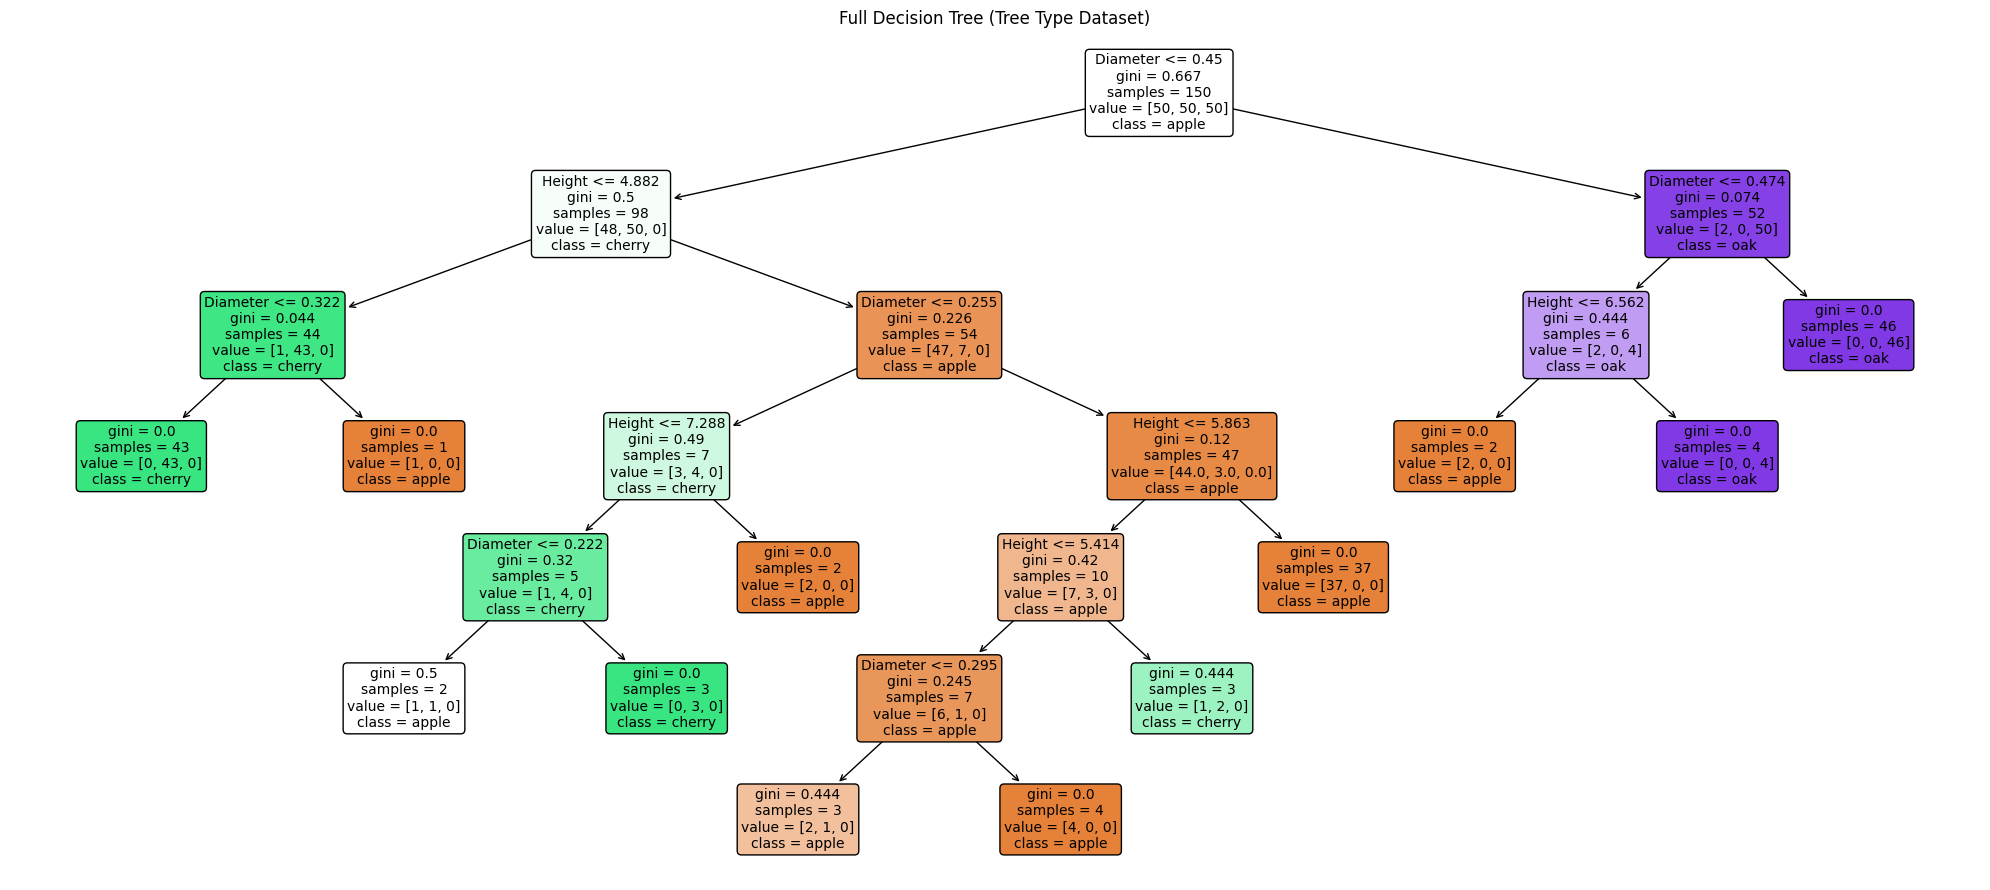

In [23]:
# Features and label
X = df[["Diameter", "Height"]].values
y_raw = df["Family"].astype(str).values

# Encode class labels
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = list(le.classes_)

# Fit a full (no max_depth cap) classification tree
clf_4 = DecisionTreeClassifier(min_samples_split=4, random_state=0) #min_samples_split/max_depth
clf_4.fit(X, y)

# Plot the full decision tree
plt.figure(figsize=(20, 9))
plot_tree(
    clf_4,
    feature_names=["Diameter", "Height"],
    class_names=class_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=False,
    fontsize=10
)
plt.title("Full Decision Tree (Tree Type Dataset)")
plt.tight_layout()
plt.show()


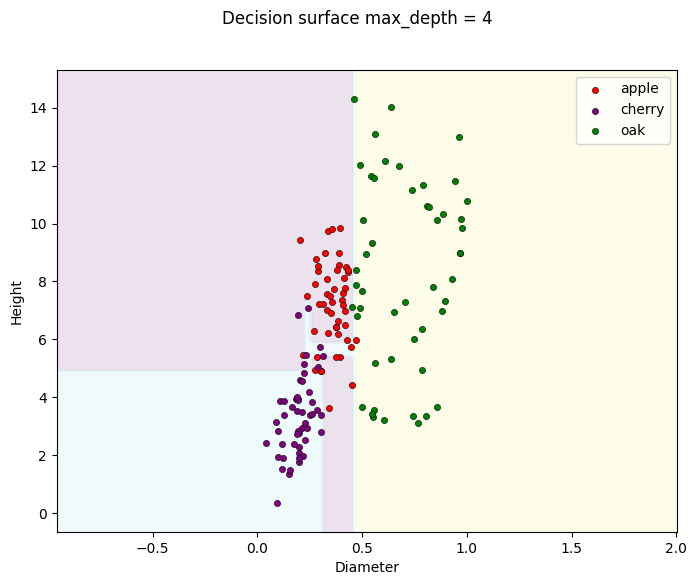

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import LinearSegmentedColormap

color_list = ['thistle', 'lightcyan', 'lemonchiffon']
dts_cmap = LinearSegmentedColormap.from_list('custom_cmap', color_list)

# Plot the decision boundary
# Using DecisionBoundaryDisplay is a modern approach in scikit-learn
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)
DecisionBoundaryDisplay.from_estimator(
    clf_4,
    X,
    cmap=dts_cmap,
    response_method="predict",
    alpha=0.5,
    ax=ax,
    xlabel="Diameter",
    ylabel="Height"
)
color_map = {"apple": "red", "cherry": "purple", "oak": "green"}
# Plot the training points
for i in range(len(class_names)):
    color = color_map[class_names[i]]
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=class_names[i],
        edgecolor="black",
        s=20,
        linewidth=0.4
    )

plt.suptitle("Decision surface max_depth = 4")
plt.legend()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

In [30]:
X = df[["Diameter", "Height"]].values
y_raw = df["Family"].astype(str).values

# Encode class labels
le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = list(le.classes_)

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(len(X), len(X_train), len(X_test))

150 100 50


In [38]:
# Fit a full (no max_depth cap) classification tree
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}\n")

F1 Score (weighted): 0.8988



In [39]:
# Fit a full (no max_depth cap) classification tree
clf_d = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_d.fit(X_train, y_train)
y_pred = clf_d.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}\n")

F1 Score (weighted): 0.9397



In [46]:
# Fit a full (no max_depth cap) classification tree
clf_4 = DecisionTreeClassifier(min_samples_leaf=5, random_state=0) #min_samples_split/max_depth
clf_4.fit(X_train, y_train)
y_pred = clf_4.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}\n")

F1 Score (weighted): 0.8988



In [48]:
from sklearn.ensemble import RandomForestClassifier
# Fit Random Forest
rf = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=None,      # grow full trees
    min_samples_split=2,
    random_state=0,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}\n")

F1 Score (weighted): 0.9193



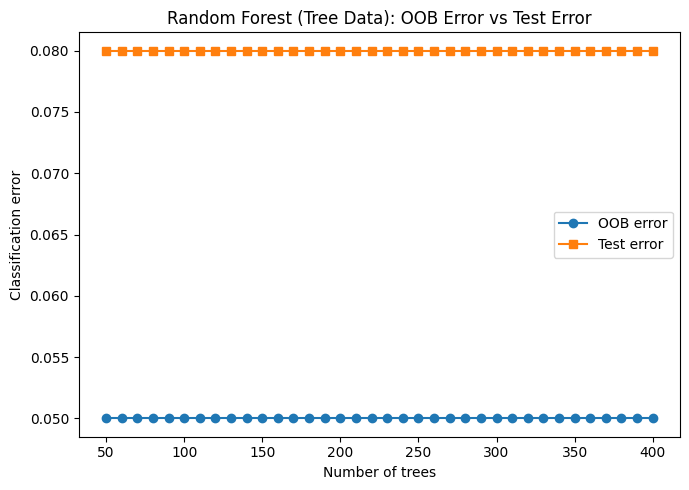

In [50]:
# ----------------------------
# Fit forests with increasing #trees
# ----------------------------
# Note: OOB can be unstable for very small forests. Feel free to start at 50.
n_estimators_list = np.arange(50, 401, 10)

oob_errors = []
test_errors = []

for n_trees in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        bootstrap=True,
        oob_score=True,      # enables OOB estimate
        random_state=0,
        n_jobs=-1,
    )
    rf.fit(X_train, y_train)

    oob_errors.append(1.0 - rf.oob_score_)
    test_errors.append(1.0 - rf.score(X_test, y_test))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(7, 5))
plt.plot(n_estimators_list, oob_errors, marker="o", label="OOB error")
plt.plot(n_estimators_list, test_errors, marker="s", label="Test error")

plt.xlabel("Number of trees")
plt.ylabel("Classification error")
plt.title("Random Forest (Tree Data): OOB Error vs Test Error")
plt.legend()
plt.tight_layout()
plt.show()


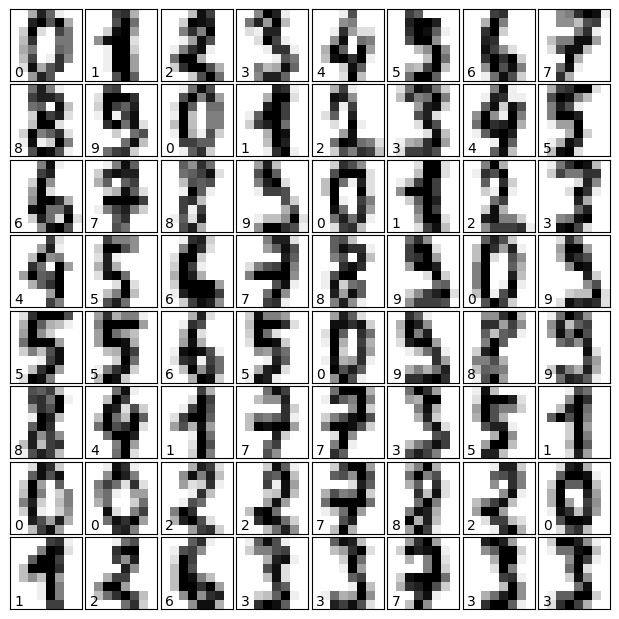

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(classification_report(ypred, ytest))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


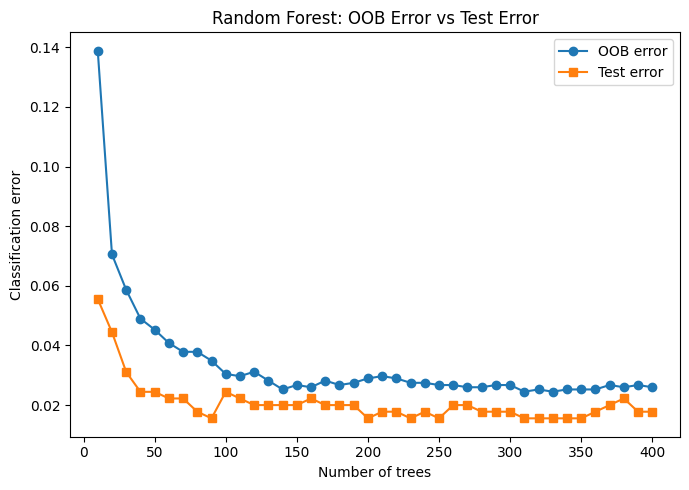

In [57]:
# ----------------------------
# Fit forests with increasing #trees
# ----------------------------
# Note: OOB can be unstable for very small forests. Feel free to start at 50.
n_estimators_list = np.arange(10, 401, 10)

oob_errors = []
test_errors = []

for n_trees in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        bootstrap=True,
        oob_score=True,      # enables OOB estimate
        random_state=0,
        n_jobs=-1,
    )
    rf.fit(Xtrain, ytrain)

    oob_errors.append(1.0 - rf.oob_score_)
    test_errors.append(1.0 - rf.score(Xtest, ytest))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(7, 5))
plt.plot(n_estimators_list, oob_errors, marker="o", label="OOB error")
plt.plot(n_estimators_list, test_errors, marker="s", label="Test error")

plt.xlabel("Number of trees")
plt.ylabel("Classification error")
plt.title("Random Forest: OOB Error vs Test Error")
plt.legend()
plt.tight_layout()
plt.show()